# Checking subgroups after all preprocessing steps

- This is to check if subgroups are worth looking for
- This was done after SMOTE out of curiosity, so not necessarily EDA
- tl;dr: found distinct subgroups within clustered data after doing PCA further

In [1]:
from collections import Counter

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd drive/MyDrive/IS4303/notebooks/new_cleaned

Mounted at /content/drive
/content/drive/MyDrive/IS4303/notebooks/new_cleaned


# Helpers

In [3]:
X_train = pd.read_csv('./5X_train.csv')
X_test = pd.read_csv('./4X_test.csv')
y_train = pd.read_csv('./5y_train.csv')
y_test = pd.read_csv('./4y_test.csv')
y_train = y_train['is_canceled']
y_test = y_test['is_canceled']

# Just KMeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


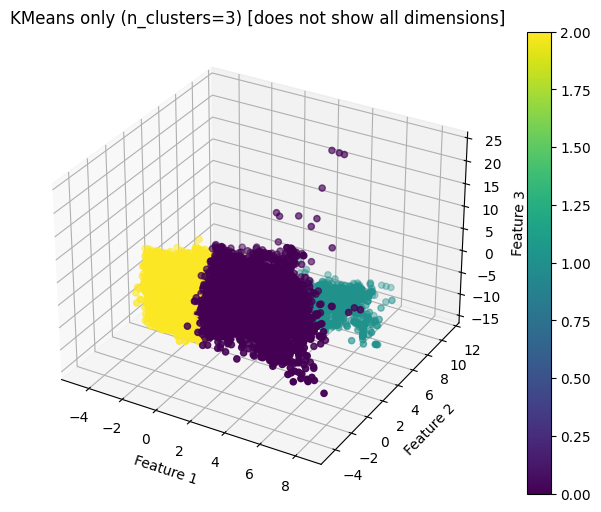

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42) 
kmeans.fit(X_train)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], X_train.iloc[:, 2], c=labels, cmap="viridis")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title(f"KMeans only (n_clusters={n_clusters}) [does not show all dimensions]")
plt.colorbar(scatter)
plt.show()

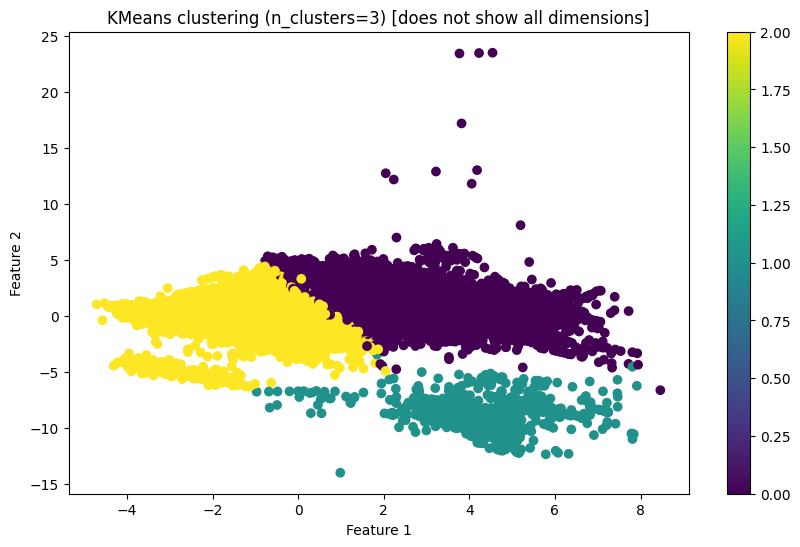

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 2], c=labels, cmap="viridis")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title(f"KMeans clustering (n_clusters={n_clusters}) [does not show all dimensions]")
plt.colorbar(scatter)
plt.show()

# KMeans after PCA
- Curse of dimensionality -> using PCA to reduce dimensions further
- Generally tried using the same components for PCA as clusters for KMeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


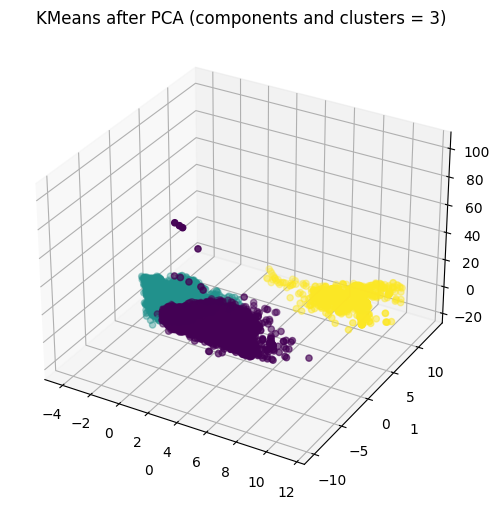

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_clusters = 3

pca = PCA(n_components=n_clusters) 
X_train_pca = pca.fit_transform(X_train)

kmeans = KMeans(n_clusters=n_clusters, random_state=42) 
kmeans.fit(X_train_pca)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

X_train_pca = pd.DataFrame(X_train_pca)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_pca.iloc[:, 0], X_train_pca.iloc[:, 1], X_train_pca.iloc[:, 2], c=labels, cmap="viridis")
ax.set_xlabel("0")
ax.set_ylabel("1")
ax.set_zlabel("2")
ax.set_title(f"KMeans after PCA (components and clusters = {n_clusters})")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


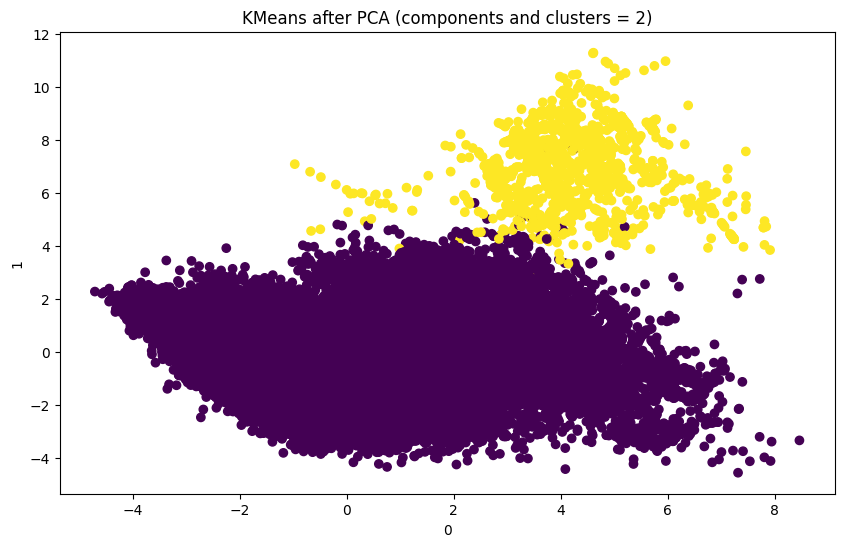

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_clusters = 2

pca = PCA(n_components=n_clusters) 
X_train_pca = pca.fit_transform(X_train)

kmeans = KMeans(n_clusters=n_clusters, random_state=420) 
kmeans.fit(X_train_pca)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

X_train_pca = pd.DataFrame(X_train_pca)

fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=labels, cmap="viridis")
ax.set_xlabel("0")
ax.set_ylabel("1")
ax.set_title(f"KMeans after PCA (components and clusters = {n_clusters})")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-4-6fa8602752bd>:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[0].scatter(X_train_pca[y_train==0][0], X_train_pca[y_train==0][1], c="blue", cmap="viridis")
<ipython-input-4-6fa8602752bd>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[1].scatter(X_train_pca[y_train==1][0], X_train_pca[y_train==1][1], c="red", cmap="viridis")


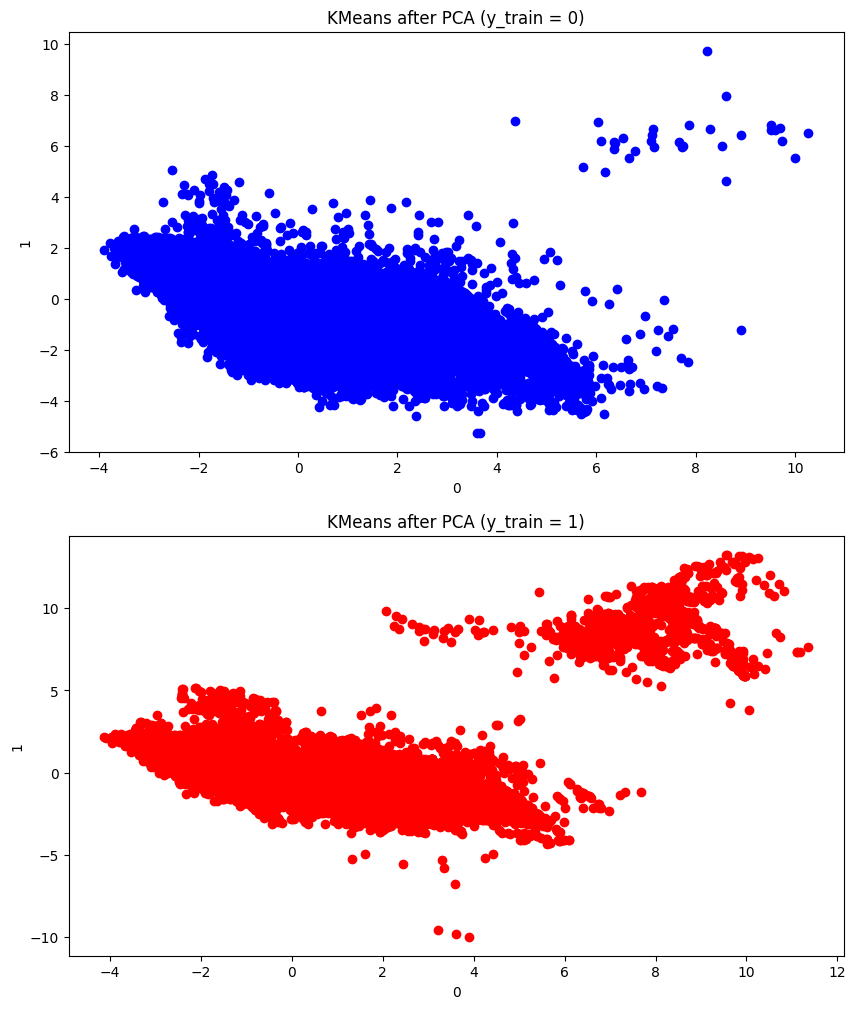

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_clusters = 2

pca = PCA(n_components=n_clusters) 
X_train_pca = pca.fit_transform(X_train)

kmeans = KMeans(n_clusters=n_clusters, random_state=420) 
kmeans.fit(X_train_pca)

X_train_pca = pd.DataFrame(X_train_pca)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

axs[0].scatter(X_train_pca[y_train==0][0], X_train_pca[y_train==0][1], c="blue", cmap="viridis")
axs[0].set_xlabel("0")
axs[0].set_ylabel("1")
axs[0].set_title("KMeans after PCA (y_train = 0)")

axs[1].scatter(X_train_pca[y_train==1][0], X_train_pca[y_train==1][1], c="red", cmap="viridis")
axs[1].set_xlabel("0")
axs[1].set_ylabel("1")
axs[1].set_title("KMeans after PCA (y_train = 1)")

plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


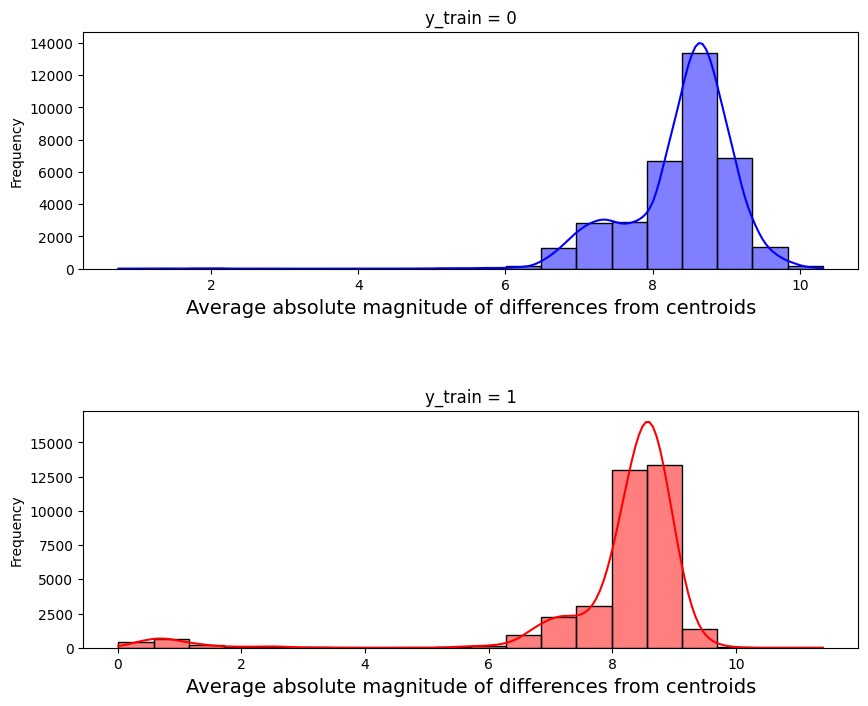


The difference in average distances between the two classes is: -0.3374


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

n_clusters = 2

pca = PCA(n_components=n_clusters)
X_train_pca = pca.fit_transform(X_train)

kmeans = KMeans(n_clusters=n_clusters, random_state=420)
kmeans.fit(X_train_pca)

X_train_pca = pd.DataFrame(X_train_pca)

centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
diff_0 = np.abs(X_train_pca[y_train == 0] - centroid_1).mean(axis=1)
diff_1 = np.abs(X_train_pca[y_train == 1] - centroid_1).mean(axis=1)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=False, gridspec_kw={"hspace": 0.6})

sns.histplot(diff_0, bins=20, color="blue", alpha=0.5, kde=True, ax=axs[0])
axs[0].set_xlabel("Average absolute magnitude of differences from centroids", fontsize=14)
axs[0].set_ylabel("Frequency")
axs[0].set_title("y_train = 0")

sns.histplot(diff_1, bins=20, color="red", alpha=0.5, kde=True, ax=axs[1])
axs[1].set_xlabel("Average absolute magnitude of differences from centroids", fontsize=14)
axs[1].set_ylabel("Frequency")
axs[1].set_title("y_train = 1")

plt.show()
diff_mean = diff_1.mean() - diff_0.mean()
print(f"\nThe difference in average distances between the two classes is: {diff_mean:.4f}")

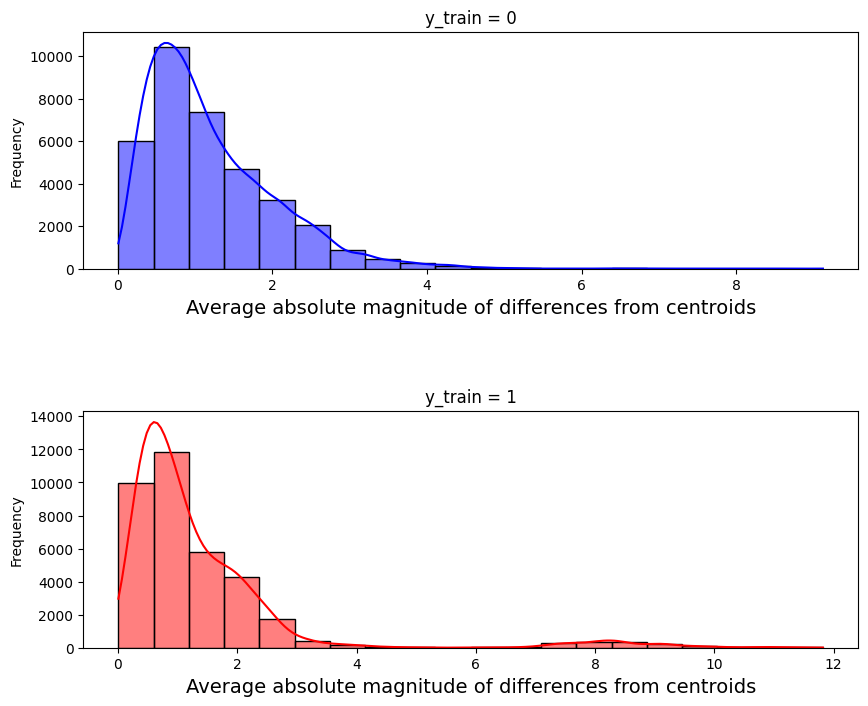


The difference in average distances between the two classes is: 0.1953


In [47]:
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
diff_0 = np.abs(X_train_pca[y_train == 0] - centroid_0).mean(axis=1)
diff_1 = np.abs(X_train_pca[y_train == 1] - centroid_0).mean(axis=1)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=False, gridspec_kw={"hspace": 0.6})

sns.histplot(diff_0, bins=20, color="blue", alpha=0.5, kde=True, ax=axs[0])
axs[0].set_xlabel("Average absolute magnitude of differences from centroids", fontsize=14)
axs[0].set_ylabel("Frequency")
axs[0].set_title("y_train = 0")

sns.histplot(diff_1, bins=20, color="red", alpha=0.5, kde=True, ax=axs[1])
axs[1].set_xlabel("Average absolute magnitude of differences from centroids", fontsize=14)
axs[1].set_ylabel("Frequency")
axs[1].set_title("y_train = 1")

plt.show()
diff_mean = diff_1.mean() - diff_0.mean()
print(f"\nThe difference in average distances between the two classes is: {diff_mean:.4f}")

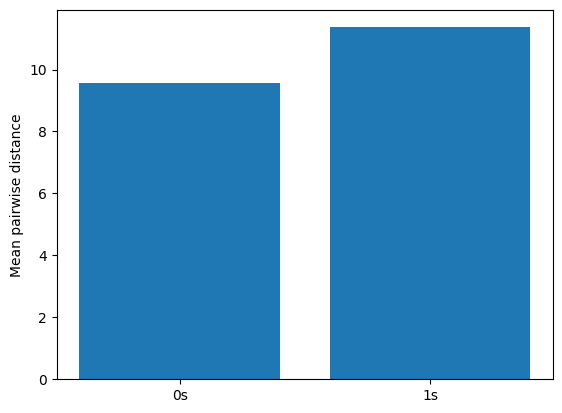

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics.pairwise import pairwise_distances

zero_indices = np.random.choice(np.where(y_train == 0)[0], size=500, replace=False) # random sampling of 500 other points with the same class, because it takes too much time for pairwise on all points
one_indices = np.random.choice(np.where(y_train == 1)[0], size=500, replace=False)
X_zero = X_train.iloc[zero_indices]
X_one = X_train.iloc[one_indices]

zero_distances = pairwise_distances(X_zero)
one_distances = pairwise_distances(X_one)

zero_mean_distance = np.mean(zero_distances)
one_mean_distance = np.mean(one_distances)

plt.bar(['0s', '1s'], [zero_mean_distance, one_mean_distance])
plt.ylabel('Mean pairwise distance')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


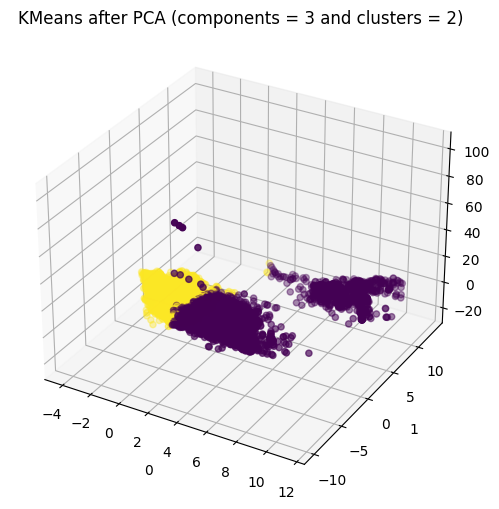

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_clusters = 2
n_components = 3

pca = PCA(n_components=n_components) 
X_train_pca = pca.fit_transform(X_train)

kmeans = KMeans(n_clusters=n_clusters) 
kmeans.fit(X_train_pca)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

X_train_pca = pd.DataFrame(X_train_pca)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_pca.iloc[:, 0], X_train_pca.iloc[:, 1], X_train_pca.iloc[:, 2], c=labels, cmap="viridis")
ax.set_xlabel("0")
ax.set_ylabel("1")
ax.set_zlabel("2")
ax.set_title(f"KMeans after PCA (components = {n_components} and clusters = {n_clusters})")
plt.show()

# Testing different models for each subgroup

In [ ]:
def get_pca_sets(X, y):
  X = X.copy()
  X_pca = pca.transform(X)
  clusters = kmeans.predict(X_pca)
  X['cluster'] = clusters
  X['y'] = y

  y_1 = X[X['cluster']==0]['y']
  y_2 = X[X['cluster']==1]['y']

  X_1 = X[X['cluster']==0].drop(columns=['cluster', 'y'])
  X_2 = X[X['cluster']==1].drop(columns=['cluster', 'y'])
  return X_1, X_2, y_1, y_2

print('Train set')
Xtrain_1, Xtrain_2, ytrain_1, ytrain_2 = get_pca_sets(X_train, y_train)
print(Xtrain_1.shape)
print(ytrain_1.shape)
print(Xtrain_2.shape)
print(ytrain_2.shape)

print('\nTest set')
Xtest_1, Xtest_2, ytest_1, ytest_2 = get_pca_sets(X_test, y_test)
print(Xtest_1.shape)
print(ytest_1.shape)
print(Xtest_2.shape)
print(ytest_2.shape)

Train set
(69913, 126)
(69913,)
(1427, 126)
(1427,)

Test set
(12712, 126)
(12712,)
(157, 126)
(157,)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
def plot_preds(preds, probas, truth):
  auc_score = roc_auc_score(truth, probas)
  prec = precision_score(truth, preds)
  rec = recall_score(truth, preds)
  f1 = f1_score(truth, preds)
  print(f"AUC: {auc_score:.2f}\n")
  print(f'Precision: {prec:.2f}')
  print(f'Recall: {rec:.2f}')
  print(f"F1: {f1:.2f}\n")

  fpr, tpr, thresholds = roc_curve(truth, probas)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % auc_score)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('ROC')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### RF for cluster 1

AUC: 0.83

Precision: 0.63
Recall: 0.64
F1: 0.63



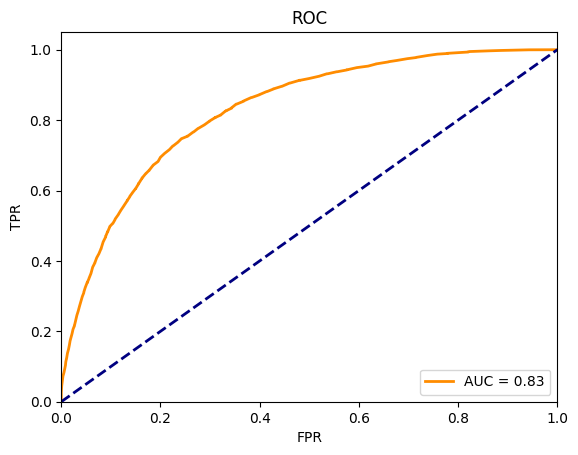

In [ ]:
clf = RandomForestClassifier().fit(Xtrain_1, ytrain_1)
y_pred_1 = clf.predict(Xtest_1)
y_pred_proba_1 = clf.predict_proba(Xtest_1)[:,1]
plot_preds(y_pred_1, y_pred_proba_1, ytest_1)

### RF for cluster 2
- This is surprisingly good
- A whole cluster is almost all positives for cancellations

AUC: 0.99

Precision: 0.98
Recall: 1.00
F1: 0.99



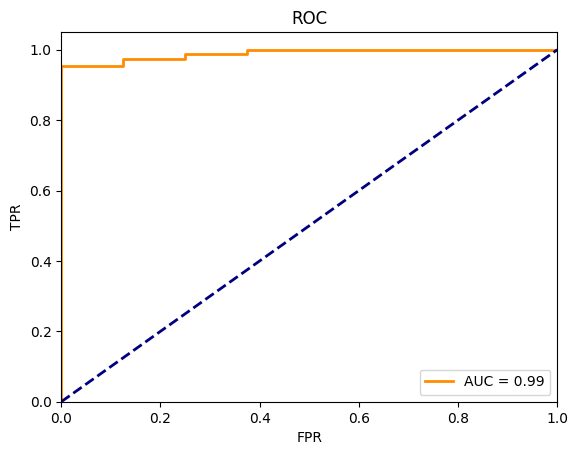

In [ ]:
clf = RandomForestClassifier().fit(Xtrain_2, ytrain_2)
y_pred_2 = clf.predict(Xtest_2)
y_pred_proba_2 = clf.predict_proba(Xtest_2)[:,1]
plot_preds(y_pred_2, y_pred_proba_2, ytest_2)

### Combined preds if we used 2 models for the whole test set
- Overall score isn't better than just using random forest, due to second cluster being a minority

AUC: 0.83

Precision: 0.64
Recall: 0.65
F1: 0.64



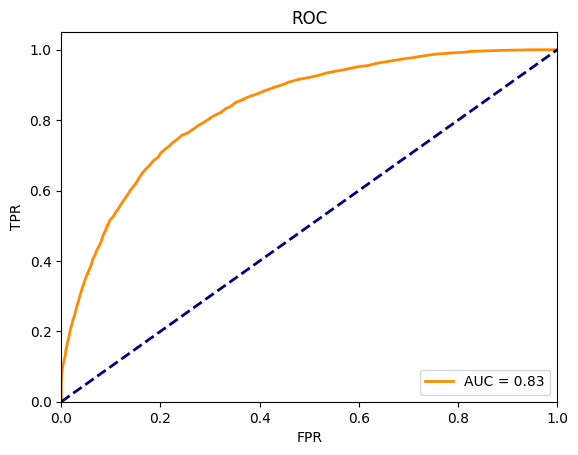

In [ ]:
y_pred = np.concatenate((y_pred_1, y_pred_2), axis=0)
y_pred_proba = np.concatenate((y_pred_proba_1, y_pred_proba_2), axis=0)
y_test_clus = np.concatenate((ytest_1, ytest_2), axis=0)
plot_preds(y_pred, y_pred_proba, y_test_clus)